In [23]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

## Reading the data

In [2]:
df = pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Pre-processing

In [3]:
# checking for null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
# checking for duplicate values
df.duplicated().sum()

0

In [5]:
# keeping only means, and dropping others
df =df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,M


In [6]:
# checking correlation
temp = df.corr()

# list values greater than 0.8 or less than -0.8
temp = temp[(temp > 0.8) | (temp < -0.8)]
temp

/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_61932/2834384656.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
radius_mean,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,NaN
texture_mean,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,0.850977,NaN
area_mean,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,0.823269,NaN
smoothness_mean,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,1.000000,0.883121,0.831135,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.883121,1.000000,0.921391,NaN
concave points_mean,0.822529,NaN,0.850977,0.823269,NaN,0.831135,0.921391,1.000000,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [7]:
# dropping perimeter_mean, area_mean and concave points_mean
df = df.drop(['perimeter_mean','area_mean','concave points_mean'], axis = 1)
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,M
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,M
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,M
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,M
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,M


/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_61932/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

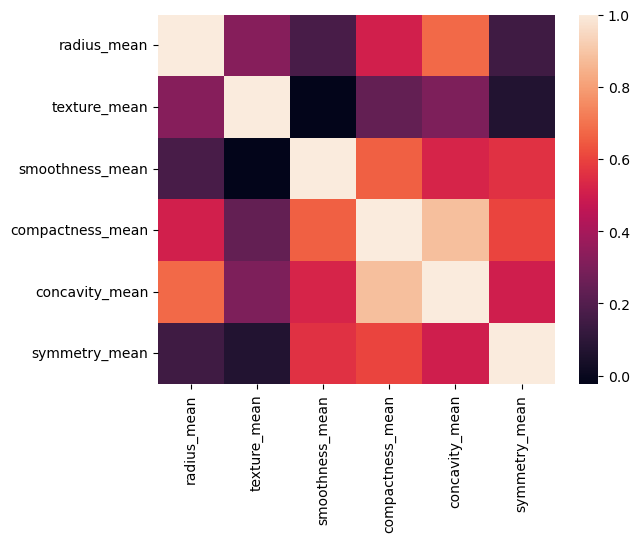

In [8]:
sns.heatmap(df.corr())

In [9]:
# performing min-max normalization
for i in df.columns:
    if i != 'diagnosis':
        df[i] = (df[i] - df[i].min())/(df[i].max() - df[i].min())
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,M
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,M
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,M
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,M
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,M


In [10]:
# encoding diagnosis
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
df.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,diagnosis
0,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,1
1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,1
2,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,1
3,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1
4,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,1


In [11]:
# performing train-test split
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

#### KNN

In [12]:
# performing KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# predicting values
y_pred = knn.predict(X_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.956140350877193

In [13]:
# performing KNN manually
def knn(X_train, y_train, X_test, y_test, k):
    y_pred = []
    for i in range(len(X_test)):
        dist = []
        for j in range(len(X_train)):
            dist.append(np.sqrt(np.sum((X_test.iloc[i] - X_train.iloc[j])**2)))
        dist = np.array(dist)
        dist = np.argsort(dist)[:k]
        y_pred.append(y_train.iloc[dist].mode()[0])
    return y_pred

In [14]:
# predicting values
y_pred = knn(X_train, y_train, X_test, y_test, 5)

# checking accuracy
accuracy_score(y_test, y_pred)

0.956140350877193

#### Naive Bayes

In [15]:
# implementing naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# predicting values
y_pred = nb.predict(X_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.9122807017543859

In [16]:
# implementing naive bayes manually
def naive_bayes(X_train, y_train, X_test, y_test):
    y_pred = []
    for i in range(len(X_test)):
        p = []
        for j in np.unique(y_train):
            p.append(np.prod(np.exp(-(X_test.iloc[i] - X_train[y_train == j].mean())**2/(2*X_train[y_train == j].std()**2))/(np.sqrt(2*np.pi)*X_train[y_train == j].std())))
        y_pred.append(np.unique(y_train)[np.argmax(p)])
    return y_pred

In [17]:
# predicting values
y_pred = naive_bayes(X_train, y_train, X_test, y_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.9122807017543859

#### SVM

In [18]:
# implementing SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

# predicting values
y_pred = svc.predict(X_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.956140350877193

In [20]:
# implementing SVM manually
def svm(X_train, y_train, X_test, y_test):
    y_pred = []
    for i in range(len(X_test)):
        dist = []
        for j in range(len(X_train)):
            dist.append(np.sqrt(np.sum((X_test.iloc[i] - X_train.iloc[j])**2)))
        dist = np.array(dist)
        dist = np.argsort(dist)[:5]
        y_pred.append(y_train.iloc[dist].mode()[0])
    return y_pred

In [21]:
# predicting values
y_pred = svm(X_train, y_train, X_test, y_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.956140350877193

#### Decision Tree

In [22]:
# implementing decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predicting values
y_pred = dt.predict(X_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.9122807017543859

In [27]:
# implementing decision tree manually

def build_tree(X, y):
    # Base cases
    if len(set(y)) == 1:
        # If all samples have the same class, return a leaf node
        return {'class': y[0]}
    if len(X[0]) == 0:
        # If there are no more features to split on, return the most common class
        class_counts = {}
        for label in y:
            if label not in class_counts:
                class_counts[label] = 0
            class_counts[label] += 1
        most_common_class = max(class_counts, key=class_counts.get)
        return {'class': most_common_class}

    # Find the best feature to split on using information gain
    best_feature_idx, best_threshold = get_best_split(X, y)

    # Split the dataset based on the best feature and threshold
    left_indices = X[:, best_feature_idx] <= best_threshold
    right_indices = X[:, best_feature_idx] > best_threshold

    # Recursively build the left and right subtrees
    left_tree = build_tree(X[left_indices], y[left_indices])
    right_tree = build_tree(X[right_indices], y[right_indices])

    # Create the current node
    return {'feature_idx': best_feature_idx,
            'threshold': best_threshold,
            'left': left_tree,
            'right': right_tree}


def get_best_split(X, y):
    best_feature_idx = None
    best_threshold = None
    best_info_gain = -float('inf')

    for feature_idx in range(len(X[0])):
        feature_values = X[:, feature_idx]
        unique_values = list(set(feature_values))
        thresholds = [(unique_values[i] + unique_values[i+1]) / 2 for i in range(len(unique_values)-1)]

        for threshold in thresholds:
            left_indices = feature_values <= threshold
            right_indices = feature_values > threshold
            info_gain = calculate_info_gain(y, left_indices, right_indices)
            if info_gain > best_info_gain:
                best_info_gain = info_gain
                best_feature_idx = feature_idx
                best_threshold = threshold

    return best_feature_idx, best_threshold


def calculate_info_gain(y, left_indices, right_indices):
    parent_entropy = entropy(y)
    left_entropy = entropy(y[left_indices])
    right_entropy = entropy(y[right_indices])

    left_weight = sum(left_indices) / len(y)
    right_weight = sum(right_indices) / len(y)

    info_gain = parent_entropy - (left_weight * left_entropy) - (right_weight * right_entropy)
    return info_gain


def entropy(y):
    unique_labels, label_counts = np.unique(y, return_counts=True)
    probabilities = label_counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


def traverse_tree(sample, tree):
    if 'class' in tree:
        return tree['class']
    feature_idx = tree['feature_idx']
    threshold = tree['threshold']
    if sample[feature_idx] <= threshold:
        return traverse_tree(sample, tree['left'])
    else:
        return traverse_tree(sample, tree['right'])

In [29]:
def decision_tree(X_train, y_train, X_test, y_test):
    tree = build_tree(X_train, y_train)
    predictions = []
    for sample in X_test:
        prediction = traverse_tree(sample, tree)
        predictions.append(prediction)
    return predictions

In [32]:
# predicting values
y_pred = decision_tree(X_train, y_train, X_test, y_test)

# checking accuracy
accuracy_score(y_test, y_pred)

0.956140350877193